In [13]:
#importing all the Required library

from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.layers import Activation, Dense

In [14]:
#Loading Datasets
#This is a dataset of 50,000 32x32 color training images and 10,000 test images, 
#labeled over 10 categories.
(train_X,train_Y),(test_X,test_Y) = cifar10.load_data()

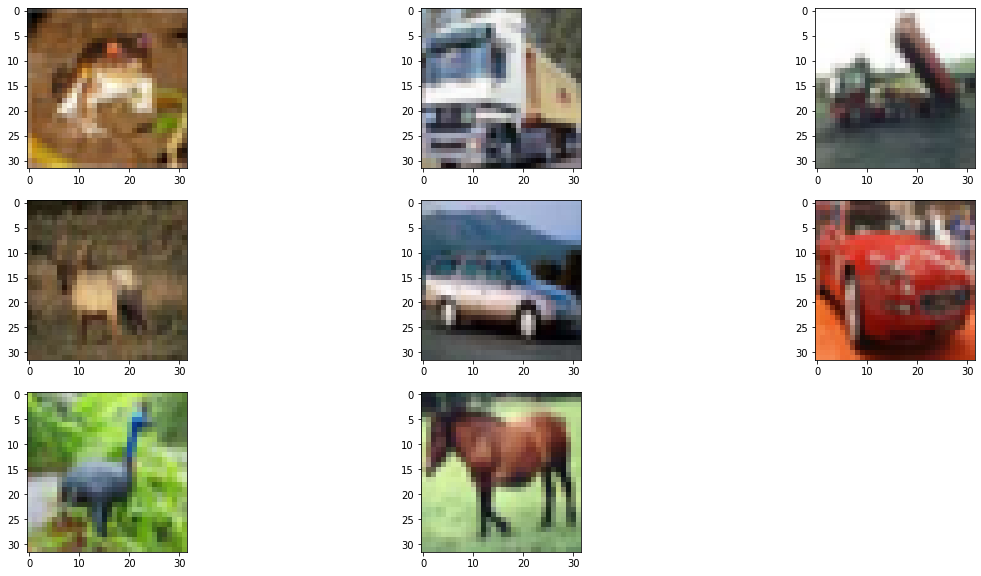

In [15]:
#Visualising the datasets
n=8
plt.figure(figsize=(20,10))
for i in range(n):
   plt.subplot(330+1+i)
   plt.imshow(train_X[i])
plt.show()

In [16]:
#Normalizing the Datasets
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X=train_X/255.0
test_X=test_X/255.0

In [17]:
#With one-hot, we convert each categorical value into a new categorical column 
#and assign a binary value of 1 or 0 to those columns.
#Converts a class vector (integers) to binary class matrix

train_Y = np_utils.to_categorical(train_Y)
test_Y = np_utils.to_categorical(test_Y)
num_classes=test_Y.shape[1]

In [18]:
# Sequencing Model
model=Sequential()


In [19]:
#Adding the Hidden Layer

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [20]:
#Adding Model optimyzer
sgd=SGD(learning_rate=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [21]:
#Printing the summary of the Model
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                      

In [22]:
#Training the model

model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=25,batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 259s 165ms/step - loss: 1.7168 - accuracy: 0.3799 - val_loss: 1.4080 - val_accuracy: 0.4898
Epoch 2/25
1563/1563 [==============================] - 259s 166ms/step - loss: 1.3583 - accuracy: 0.5109 - val_loss: 1.2326 - val_accuracy: 0.5645
Epoch 3/25
1563/1563 [==============================] - 293s 187ms/step - loss: 1.1692 - accuracy: 0.5832 - val_loss: 1.0941 - val_accuracy: 0.6080
Epoch 4/25
1563/1563 [==============================] - 166s 106ms/step - loss: 1.0374 - accuracy: 0.6313 - val_loss: 1.0324 - val_accuracy: 0.6346
Epoch 5/25
1563/1563 [==============================] - 160s 102ms/step - loss: 0.9413 - accuracy: 0.6640 - val_loss: 0.9901 - val_accuracy: 0.6512
Epoch 6/25
1563/1563 [==============================] - 169s 108ms/step - loss: 0.8548 - accuracy: 0.6975 - val_loss: 0.9510 - val_accuracy: 0.6665
Epoch 7/25
1563/1563 [==============================] - 167s 107ms/step - loss: 0.7918 - accuracy: 0.7204 - val_

In [23]:
#Calculating the accuracy of the Model

acc=model.evaluate(test_X,test_Y)
print(acc*100)


313/313 [==============================] - 7s 21ms/step - loss: 1.0668 - accuracy: 0.7044
[1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000029563904, 1.0667529106140137, 0.7044000

In [24]:
#Finally Saving the model

model.save("FinalModel.h5")
